# K-Means Clustering

#### 설명

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("./장애유형별_장애인_성_시군구별__20240420194105.csv", encoding= 'EUC-KR')
df.head()

,시군구별,지체,시각,청각,언어,지적,자폐
0,서울특별시 종로구,2429,676,973,45,399,109
1,서울특별시 중구,2411,689,914,29,307,76
2,서울특별시 용산구,3145,926,1197,63,526,142
3,서울특별시 성동구,4870,1108,1721,101,704,211
4,서울특별시 광진구,5308,1302,1847,92,805,210


In [7]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 사용시 마이너스 폰트가 깨지는 문제가 발생할 수 있으므로 설정변경
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "/workspaces/ml202401-midterm-8silv3rain8/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~~~')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 52285 

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.tight_layout()
findfont: Font family 'NanumBarunGothic' not found.
/tmp/ipykernel_21189/1250766690.py:37: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph

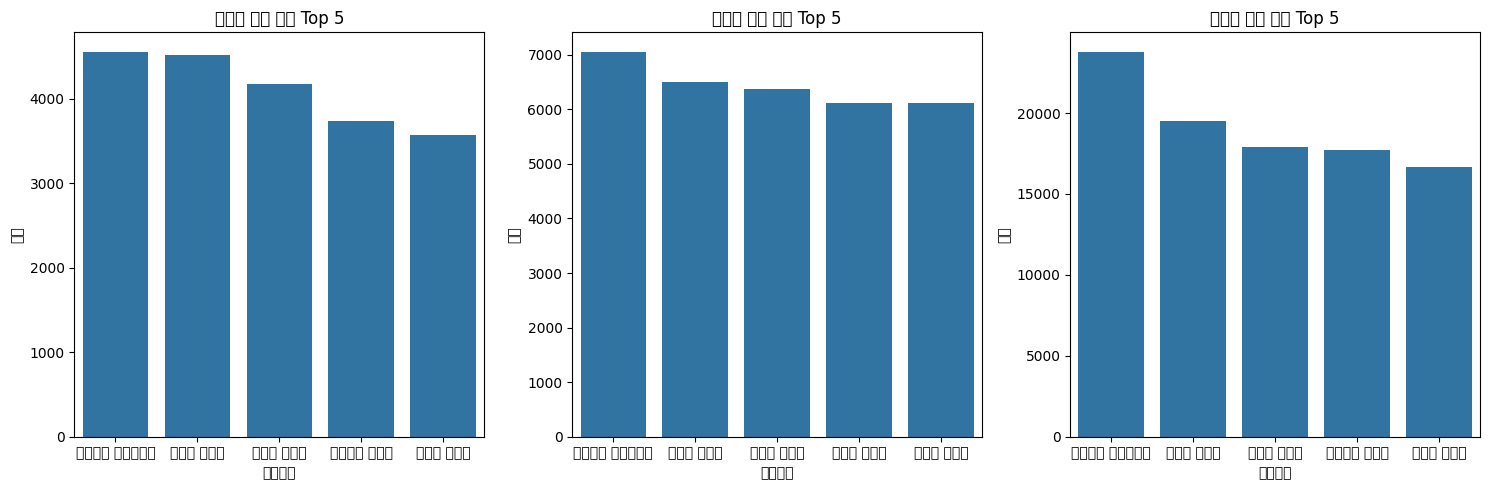

In [8]:
# 데이터 불러오기
df = pd.read_csv("./장애유형별_장애인_성_시군구별__20240420194105.csv", encoding='EUC-KR')

# 시각, 청각, 지체에 해당하는 수만 선택
df_selected = df[['시군구별', '시각', '청각', '지체']]

# 시각이 많은 지역 top5
top_visual = df_selected.nlargest(5, '시각')

# 청각이 많은 지역 top5
top_hearing = df_selected.nlargest(5, '청각')

# 지체가 많은 지역 top5
top_physical = df_selected.nlargest(5, '지체')

# 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 시각화
plt.figure(figsize=(15, 5))

# 시각이 많은 지역 top5 시각화
plt.subplot(1, 3, 1)
sns.barplot(x='시군구별', y='시각', data=top_visual)
plt.title('시각이 많은 지역 Top 5')

# 청각이 많은 지역 top5 시각화
plt.subplot(1, 3, 2)
sns.barplot(x='시군구별', y='청각', data=top_hearing)
plt.title('청각이 많은 지역 Top 5')

# 지체가 많은 지역 top5 시각화
plt.subplot(1, 3, 3)
sns.barplot(x='시군구별', y='지체', data=top_physical)
plt.title('지체가 많은 지역 Top 5')

plt.tight_layout()
plt.show()
